# <center>  MDI341: TP Graphs </center> #
### <center>Elaboré par : Mohamed DHAOUI - MS Big Data à Télécom Paristech 
  
  
  
  
  
  

Depuis quelques dizaines d’années, des chercheurs de disciplines aussi variées que les neurosciences, la sociologie, ou les sciences politiques se sont aperçus qu’ils partageaient le besoin de comprendre finement des relations entre différentes entités organisées en réseaux (portions cérébrales, individus, institutions, etc.). Grâce à des collaborations avec des chercheurs en mathématiques et informatique, il est devenu peu à peu évident que les techniques utilisées dans chaque domaine pouvaient s’appliquer aux autres : le champ de la network science était né.

Dans ce TP , nous allons étudier une librairie de python  appelée NetworkX, qui permet traiter les problèmes de graphes. Bien qu’elle ne soit pas forcément la plus rapide comparée à certains frameworks dédiés aux graphes, elle présente l’avantage de comporter plusieurs fonctions utiles  qui rend l’utilisation et la manipulationn des graphes  plus facile. On peut ainsi combiner, comme on va le faire, des traitements classiques et des traitements spécifiques aux graphes sous-jacents dans nos données.

![Texte alternatif…](http://cedric.cnam.fr/vertigo/Cours/RCP216/_images/modules.png)

**Warning**: Ce notebook a été conçu pour fonctionner avec NetworkX version 1.11. De légers problèmes de compatibilité peuvent être rencontrés avec NetworkX 2.x.

## Import des packages 

In [0]:
################################## installation de la version 1.1 de NX ####################################

!pip install networkx==1.11

In [0]:
################################## downgrad de matplotlib ##################################################
!pip install matplotlib==2.1

In [0]:

################################### Chargement des packages nécessaires ######################################

import numpy as np
import pandas as pd
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import os.path
import urllib
import tarfile
import sys
import matplotlib.pyplot as plt
from networkx import nx
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn import metrics
from sklearn import metrics
import warnings
import seaborn as sns
from sklearn.metrics import confusion_matrix
import collections
import matplotlib.pyplot as plt
import networkx as nx


warnings.filterwarnings('ignore')



**Note** : la documentation de NetworkX se trouve [ici](http://networkx.readthedocs.io/)

## Analyse de graphes

### Erdős-Rényi

#### Question 1

#### On commence par créer et visualiser un graphe de type Erdős-Rényi avec n=200 noeuds et p=0.04. Vous aurez besoin des fonctions `nx.erdos_renyi_graph` et `nx.draw`.

Le modèle Erdős–Rényi  est utilisé pour générer un graphe aléatoire dans lequel les arêtes sont définies entre les nœuds avec des probabilités égales. Il peut être employé dans une approche probabiliste afin de démontrer l'existence de graphes satisfaisant à une variété de propriétés, ou encore à procurer une définition rigoureuse de ce qu'implique une propriété pour presque tous les graphes.

Pour générer un modèle Erdős–Rényi G(n,p)  deux paramètres doivent être spécifiés : 
* le nombre total de sommets n 
* probabilité p qu'une paire aléatoire de sommets soit reliée par une arête.

Le modèle étant généré sans biais pour des nœuds particuliers, la distribution des degrés est binomiale : pour un sommet v sélectionné de façon aléatoire : 

![Texte alternatif…](https://wikimedia.org/api/rest_v1/media/math/render/svg/02f318dc5799b4ee47340adfa9a9c22ac3a5f16c)

Essayons de générer un graphe d'Erdos Reyni et voir ses propriétés :

Graphe d'Erdős-Rényi


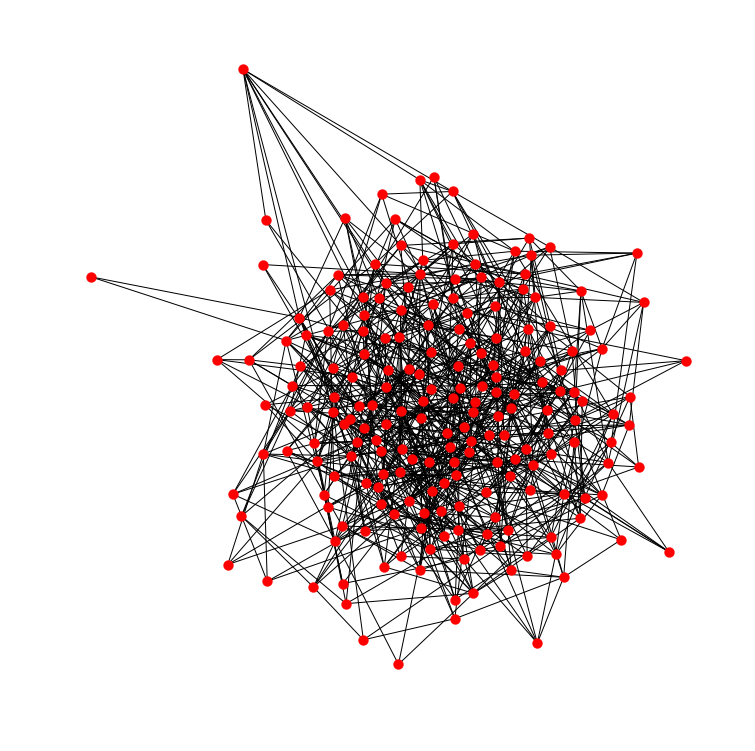

In [5]:



##################" Parametres du graphes ########################
n = 200  ##### nombre total de sommets 
p = 0.04 #####  probabilité de liaison entre deux pairs de noeuds


################## Generation du graphe #########################
G_erdos = nx.erdos_renyi_graph(n, p)


################## plot du graphe ###############################

print ("Graphe d'Erdős-Rényi")
plt.figure(figsize=(10,10))
nx.draw(G_erdos, node_size = 100)
plt.show()

################## some properties #####################################
#print("node degree clustering")
#for v in nx.nodes(G_erdos):
 #  print('%s %d %f' % (v, nx.degree(G_erdos, v), nx.clustering(G_erdos, v)))

#print the adjacency list to terminal
#try:
 #   nx.write_adjlist(G_erdos, sys.stdout)
#except TypeError:  # Python 3.x
 #   nx.write_adjlist(G_erdos, sys.stdout.buffer)

#nx.draw(G_erdos, node_size = 100)
#plt.show()

#### Question 2

Calculons des statistiques sur le nombre d'arêtes et la distribution des degrés : 

Plusieurs indicateurs pouvant nous servir par la suite peuvent être calculés. Pour chaque nœud, on peut ainsi calculer le degré, la centralité intermédiaire ou l’intermédiarité (betweenness), l’éloignement moyen :


In [6]:
######################### Affichage de dégrés de chaque noeud #########################

print ( " Les degrés de chaque noeud :  \n  ") 
G_erdos.degree()

 Les degrés de chaque noeud :  
  


{0: 4,
 1: 4,
 2: 10,
 3: 8,
 4: 6,
 5: 9,
 6: 6,
 7: 10,
 8: 8,
 9: 11,
 10: 8,
 11: 8,
 12: 8,
 13: 2,
 14: 10,
 15: 10,
 16: 11,
 17: 5,
 18: 5,
 19: 8,
 20: 7,
 21: 13,
 22: 10,
 23: 8,
 24: 8,
 25: 9,
 26: 6,
 27: 11,
 28: 8,
 29: 10,
 30: 5,
 31: 12,
 32: 7,
 33: 12,
 34: 9,
 35: 11,
 36: 9,
 37: 9,
 38: 5,
 39: 8,
 40: 3,
 41: 6,
 42: 6,
 43: 8,
 44: 11,
 45: 8,
 46: 5,
 47: 8,
 48: 8,
 49: 7,
 50: 10,
 51: 10,
 52: 10,
 53: 8,
 54: 7,
 55: 8,
 56: 11,
 57: 6,
 58: 4,
 59: 7,
 60: 14,
 61: 14,
 62: 10,
 63: 12,
 64: 7,
 65: 9,
 66: 14,
 67: 8,
 68: 8,
 69: 13,
 70: 9,
 71: 8,
 72: 6,
 73: 8,
 74: 7,
 75: 8,
 76: 6,
 77: 3,
 78: 9,
 79: 9,
 80: 11,
 81: 6,
 82: 10,
 83: 6,
 84: 10,
 85: 12,
 86: 7,
 87: 8,
 88: 10,
 89: 7,
 90: 9,
 91: 4,
 92: 4,
 93: 4,
 94: 10,
 95: 7,
 96: 9,
 97: 8,
 98: 10,
 99: 8,
 100: 8,
 101: 19,
 102: 6,
 103: 6,
 104: 5,
 105: 7,
 106: 7,
 107: 12,
 108: 5,
 109: 4,
 110: 12,
 111: 10,
 112: 10,
 113: 13,
 114: 9,
 115: 9,
 116: 4,
 117: 6,
 118: 6,
 1

In [7]:
print ( "le nombre des arretes  est : %s" % nx.number_of_edges(G_erdos))

le nombre des arretes  est : 824


In [8]:
print ( "le nombre des noeuds  est : %s" % nx.number_of_nodes(G_erdos))

le nombre des noeuds  est : 200


In [9]:
###################################  Affichage de statistiques sur les degrés     ####################################################

listdegree=[val for (node, val) in G_erdos.degree().items()]  #######" recuperationde tous les degres en une liste 

max_degree=max(listdegree)
min_degree=min(listdegree)
mean_degree=np.mean(listdegree)
median_degree=np.median(listdegree)

print( "Le max des degrees est %s , le min est %s, la moyenne est %s  et la mediane est %s " %(max_degree,min_degree,mean_degree,median_degree))

Le max des degrees est 19 , le min est 2, la moyenne est 8.24  et la mediane est 8.0 


In [10]:
esperence_empirique=p*n
print(" L'esperence empirique est %s , la moyenne est %s" %(esperence_empirique,mean_degree))

 L'esperence empirique est 8.0 , la moyenne est 8.24


On remarque que l'esperence empirique et la valeur réelle de la moyenne des degrés sont très proches  mais on n'a pas l'égalité  , cette différence est vraisemblablement dû au facteur aléatoire de la génération du graphe . Pour illustrer cela , essayons de génerer plusieurs graphes d'Erdos avec les même paramètres n et p et observons leurs variations autour de l'esperence empirique :

In [0]:
######################### Génération de plusieurs graphes pour mesurer l'écart entre la moyenne des dégrés et l'esperence empirique ################

n = 200
p = 0.04
iterations=100  ######## 1000 iterations 
listmoy=[]  ### liste pour stocker les moyennes de degrés obtenur à chaque itération 
for i in range(iterations):
  G_erdos_test = nx.erdos_renyi_graph(n, p)
  listdegree=[val for (node, val) in G_erdos_test.degree().items()]
  mean_degree=np.mean(listdegree)
  listmoy.append(mean_degree)
  

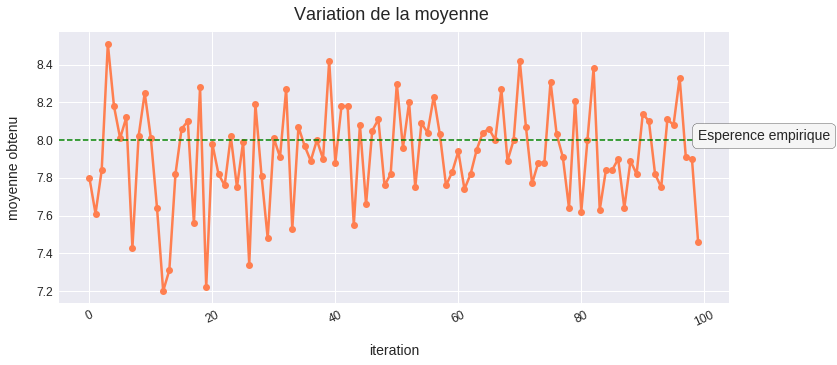

In [12]:

############################                           Affichage du graphe                         ##################################################

plt.figure(figsize=(12, 5))
plt.plot(range(iterations), listmoy, color='coral', marker='o', linewidth=2.5)
plt.title("Variation de la moyenne ", fontsize=18, y=1.02)
plt.xlabel("iteration", fontsize=14, labelpad=15)
plt.ylabel("moyenne obtenu", fontsize=14, labelpad=15)
plt.tick_params(labelsize=12, pad=6)
plt.xticks(rotation=25)
plt.grid(True)
plt.axhline(y=esperence_empirique, color='green', linestyle='--', linewidth=1.5)
plt.text(x=range(iterations)[-1], y=esperence_empirique, s="Esperence empirique", fontsize=14,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"));

Comme on le voit dans le graphe ci-dessus ,l'écart entre la moyenne des dégrés d'un graphe de type `Erdős-Rényi `   et l'espérence empirique est dû à un facteur aléatoire lié à la génération du graphe .On trouve parfois des valeurs égales à l'esperence empirique.  Pour pallier à cet effet , on peut simplement fixer le seed ..

#### Question 3

**On trace la distribution des degrés en échelle normale, puis en échelle log-log. La fonction `nx.degree_histogram` vous sera utile.**




Essayons maintenant de voir de dessiner la distribution des degrés . Thériquement , on devrait obtenir une distribution binomiale : 

![Texte alternatif…](https://wikimedia.org/api/rest_v1/media/math/render/svg/02f318dc5799b4ee47340adfa9a9c22ac3a5f16c)


Text(0.5,0,'log-Degre')

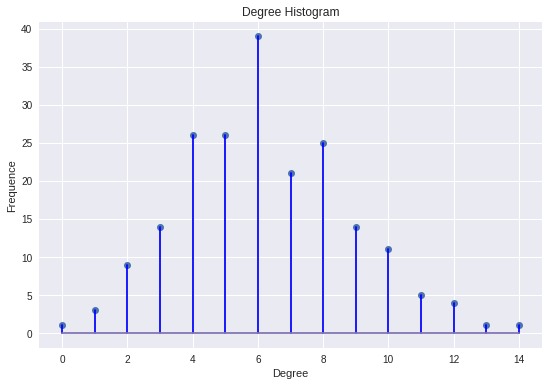

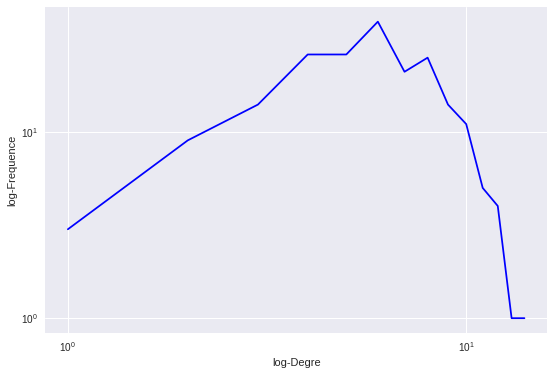

In [14]:


degree_sequence = sorted([d for n, d in G_erdos.degree().items()], reverse=False)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


#fig, ax = plt.subplots()
plt.figure(figsize=(9,6))
plt.stem(cnt, 'b-')
#plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Frequence")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)



plt.figure(figsize=(9,6))
plt.loglog(cnt, 'b-')
plt.ylabel("log-Frequence")
plt.xlabel("log-Degre")


Conformement à ce qui est attendu , on a obtenu une distribution binomiale  concentrée sur la moyenne des degrés ( 8 )  . Cette probabilité diminue exponentiellement avec les degrés elévés

#### Question 4

On calcule maintenant le coefficient de clustering global (voir `nx.clustering`) . Pour ce faire , on commence par calculer le coefficient de clustering de chaque noeud  puis on moyenne toutes les valeurs obtenues

In [15]:
################################## Calcul du coefficient du clustering par noeud ####################################

print ("Le coefficient de clustering par noeud : \n" )
print(nx.clustering(G_erdos))

Le coefficient de clustering par noeud : 

{0: 0.16666666666666666, 1: 0.0, 2: 0.044444444444444446, 3: 0.07142857142857142, 4: 0.0, 5: 0.05555555555555555, 6: 0.0, 7: 0.044444444444444446, 8: 0.03571428571428571, 9: 0.01818181818181818, 10: 0.03571428571428571, 11: 0.07142857142857142, 12: 0.03571428571428571, 13: 0.0, 14: 0.044444444444444446, 15: 0.044444444444444446, 16: 0.01818181818181818, 17: 0.0, 18: 0.0, 19: 0.14285714285714285, 20: 0.047619047619047616, 21: 0.07692307692307693, 22: 0.022222222222222223, 23: 0.07142857142857142, 24: 0.03571428571428571, 25: 0.0, 26: 0.0, 27: 0.01818181818181818, 28: 0.03571428571428571, 29: 0.044444444444444446, 30: 0.0, 31: 0.015151515151515152, 32: 0.0, 33: 0.07575757575757576, 34: 0.027777777777777776, 35: 0.01818181818181818, 36: 0.05555555555555555, 37: 0.0, 38: 0.0, 39: 0.07142857142857142, 40: 0.0, 41: 0.13333333333333333, 42: 0.0, 43: 0.03571428571428571, 44: 0.03636363636363636, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.03571428571428571, 49: 

In [16]:
################################## Calcul du coefficient du clustering global ####################################

coef_clustering_e=np.mean(list(nx.clustering(G_erdos).values()))
print ("Le coefficient de clustering global est %.4f " % np.mean(list(nx.clustering(G_erdos).values())))

Le coefficient de clustering global est 0.0376 


On trouve bien que le coefficient de clustering global du modèle Erdos-Renyi est très proche du paramètre  p=0.04 , ce qui conforme avec les résultats théorique vu dans le cours 

#### Question 5

On affiche la longueur moyenne des plus courts chemins et le diamètre du graphe . 

Pour calculer la longeur moyenne des plus courts chemins , on calcule les plus courts chemins entre tous les pairs des noeuds puis on moyenne les valeurs obtenurs . Pour le diamètre , on le définit comme le max des plus courts chemins .

In [0]:

####################### recuperation des tous les plus courts chemins ########################
listppcnodes=[]
for node in list(G_erdos.nodes()) : 
    listppcnodes.append((list(nx.shortest_path_length(G_erdos,source=node).values())))
    
### liste de tous les ppc  en supprimant les 0 ######
flat_list_ppc = [item for sublist in listppcnodes for item in sublist if item >0]

### calcul de la moyenne des ppc #####
mean_ppc=np.mean(flat_list_ppc)


######################## recuperation du diamètre = max des ppc #######################################
    
diametre=np.max(flat_list_ppc)

In [18]:
print ("la moyenne des plus petis chemins est %.2f  , le diametre est %.2f" %(mean_ppc ,diametre ) )

la moyenne des plus petis chemins est 2.73  , le diametre est 5.00


Maintenant , on va essayer de vérifier s'il y a un effet du petit monde dans notre graphe  .
Les graphes qui exhibent cet effet ont générallement une structure spatiale qui refelete un coefficient de clustering moyen elevé .Aussi ces graphes sont efficace dans la communication et de ce fait présente un coefficient de plus petit chemin faible . 


De ce fait , pour quantifier  l'effet du "petit monde" , on  peut envisager  plusieurs mesures , à savoir : 

* Le  coefficient de clustering moyen
* Le diamètre du graphe
* La distribution des plus petit chemin entre les noeuds  et sa moyenne  



Si on se base sur les mesures calculés ci dessus , on voit bien une  difference entre la moyenne des plus courts chemins et le diamètre du graphe , ce qui signifie  qu'on n'est pas dans un contexte de "small word"  . 
Une deuxième piste consiste à comparer la moyenne des plus court chemin L et le coefficient de clustering moyen C  à des valeurs seuils Lr et Cr calculés sur plusieurs graphes générés alétoiremennt . On calcule ensuite  λ:=L/Lr. and γ:=C/Cr.  
si par exemple , λ≈1 et  γ>1 , on peut dire qu'on a l'effet "small word" dans notre graphe 

Une autre manière consiste à se baser sur un coefficient "smallworld.omega" qui est prédéfini dans  la version 2.1 de networkx  ( omega = Lr/L - C/Cl )

On peut dire aussi que le paramètre p est étroitement lié à l'effet du petit monde , si on augmente p , les noeuds tendent à s'interconnecter 



### Barabási–Albert

#### Question 6

**On crée et visualise maintenant un graphe de Barabási–Albert avec n=200 noeuds (on ajoute à chaque fois m=3 arêtes), puis on applique la même analyse que celle faite pour Erdős-Rényi**

Le modèle de Barabási–Albert est un modèle de réseau aléatoire et sans échelle utilisé pour démontrer l'attachement préférentiel, ou, en d'autres termes, l'effet que « le riche devient plus riche ». Dans ce modèle, une arête a plus de probabilité de se lier à des sommets qui ont un plus haut degré qu'eux, ou encore dit autrement « pourquoi mes amis sont souvent plus populaires que moi ». La modélisation commence par un réseau initial de m0 sommets. m0 ≥ 2 et où le degré de chaque sommet dans le réseau initial devrait être d'au moins 1, sinon il restera toujours déconnecté du reste du réseau (exclu).

Dans le modèle BA, les nouveaux sommets sont ajoutés au réseau un à un. Chaque nouveau sommet est connecté à m  sommets existants avec une probabilité qui est proportionnelle au nombre de liens que ce sommet a déjà au sein du réseau. Formellement, la probabilité pi que le nouveau sommet soit connecté au sommet i est : 

![Texte alternatif…](https://wikimedia.org/api/rest_v1/media/math/render/svg/a1bfcf374deb958fc3727dcf28c59e3647cd5278)

Graphe du Barabási–Albert 


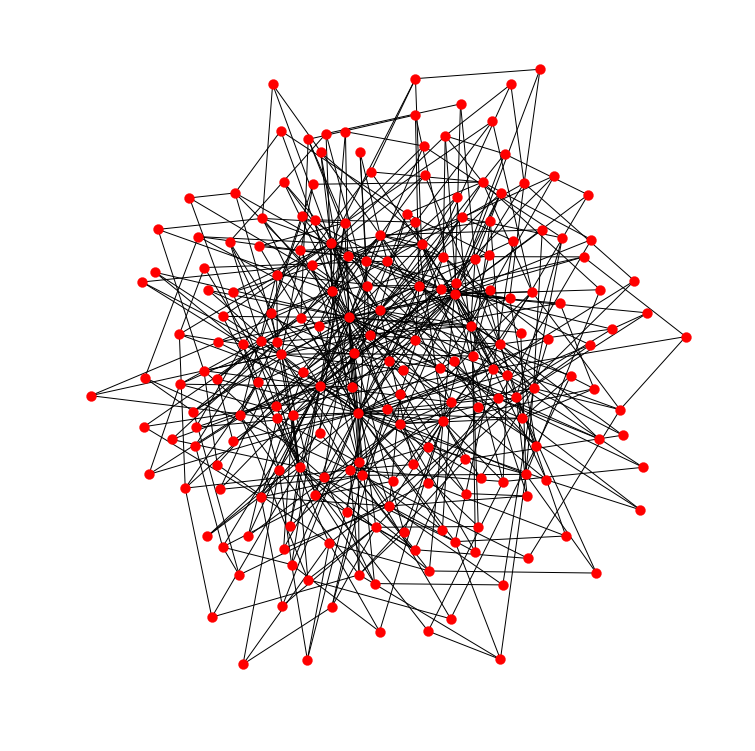

In [19]:
############################### Generation du graphe  BA ###############################

n = 200 #### nombre de noeuds 
m = 3  ### le nombre de sommets  connecter pour un noeud 
G_barabasi = nx.barabasi_albert_graph(n, m)


############################## affichage du graphe ####################################
print( "Graphe du Barabási–Albert ")
plt.figure( figsize=(10,10))
nx.draw(G_barabasi, node_size = 100)
plt.show()

Essayons maintenant de reprendre la même analyse faites sur le graphe d'Erdős-Rény :  On commence par afficher les statistiques de bases sur le graphe , ensuite on fera une analyse comparative entre le graphe de BA et celui d' Erdős-Rény 

le nombre des arretes  est : 591
le nombre des noeuds  est : 200
Le max des degrees est 42 , le min est 3, la moyenne est 5.91  et la mediane est 4.0 
Le coefficient de clustering global est 0.0777 


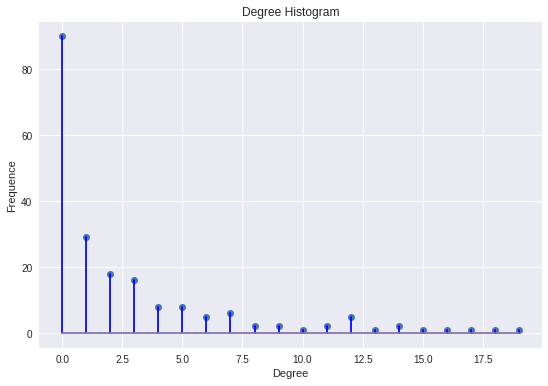

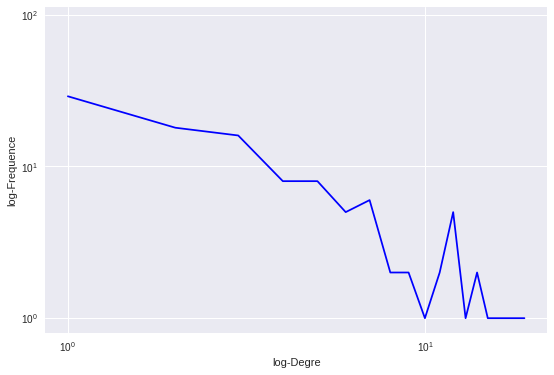

In [20]:
###################################### Statistiques de base ; nombre d'arretes , nombre de noeuxs , max,min, moyenne , median des degrés ##################################
print ( "le nombre des arretes  est : %s" % nx.number_of_edges(G_barabasi))
print ( "le nombre des noeuds  est : %s" % nx.number_of_nodes(G_barabasi))





############### statistique sur les degrés #####################
listdegree=[val for (node, val) in G_barabasi.degree().items()]

max_degree_b=max(listdegree)
min_degree_b=min(listdegree)
mean_degree_b=np.mean(listdegree)
median_degree_b=np.median(listdegree)

print( "Le max des degrees est %s , le min est %s, la moyenne est %s  et la mediane est %s " %(max_degree_b,min_degree_b,mean_degree_b,median_degree_b))



######################################### Distribution des degrés  #####################

degree_sequence = sorted([d for n, d in G_barabasi.degree().items()], reverse=False)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


#fig, ax = plt.subplots()
plt.figure(figsize=(9,6))
plt.stem(cnt, 'b-')
#plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Frequence")
plt.xlabel("Degree")
#ax.set_xticks([d + 0.4 for d in deg])
#ax.set_xticklabels(deg)



plt.figure(figsize=(9,6))
plt.loglog(cnt, 'b-')
plt.ylabel("log-Frequence")
plt.xlabel("log-Degre")



################################### coefficient de clustering #############################

#print ("Le coefficient de clustering par noeud : \n" )
#print(nx.clustering(G_barabasi))

print ("Le coefficient de clustering global est %.4f " % np.mean(list(nx.clustering(G_barabasi).values())))


coef_clustering_b=np.mean(list(nx.clustering(G_barabasi).values()))

On vérifie bien que le graphe obtenue est  conhérent avec  la forme de la loi de puissance  vu dans le cours  :   ![Texte alternatif…](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb1fd339d6c23968d5ff519fa886c465d454fd37)

On a essayé de relancer la génération des graphes à plusieurs reprises et on a verifié que la valeur des moyennes des degrés demeure constante  ( 5.91) . 







In [0]:

############################################ récuperation du ppc et du diamètre ######################################


listppcodes=[]
for node in list(G_barabasi.nodes()) : 
    listppcnodes.append((list(nx.shortest_path_length(G_barabasi,source=node).values())))
    




####################### recuperation des tous les plus courts chemins ########################

### liste de tous les ppc  en supprimant les 0 ######
flat_list_ppc_b = [item for sublist in listppcnodes for item in sublist if item >0]

### calcul de la moyenne des ppc #####
mean_ppc_b=np.mean(flat_list_ppc_b)


######################## recuperation des max des ppc #######################################
    
diametre_b=np.max(flat_list_ppc_b)



In [22]:
print ("la moyenne des plus petis chemins est %.2f  , le diametre est %.2f" %(mean_ppc_b,diametre_b ) )

la moyenne des plus petis chemins est 2.79  , le diametre est 5.00


On voit qu'on a une forme quasi

#### Analyse comparatif ####

Essayons maintenant de comparer les deux types de graphes en se basant sur quelques mesures déjà précalulés : 


In [25]:

tables_compar=pd.DataFrame([["mean_degree","coef_clustering","diametre","mean_ppc"],[mean_degree,coef_clustering_e,diametre,mean_ppc],[mean_degree_b,coef_clustering_b,diametre_b,mean_ppc_b]]).T
tables_compar.columns=["Mesure","Erdos","Barabasi"]
tables_compar

,Mesure,Erdos,Barabasi
0,mean_degree,7.46,5.91
1,coef_clustering,0.0376267,0.0777055
2,diametre,5,5
3,mean_ppc,2.72915,2.79156



On constate que la moyenne des degrés pour le graphe de Barabarsi est plus faible que celui de Erdos  , cela ne peut pas etre généralisé car ces mesures dépendent des paramètres de graphe ( on peut diminuer p par exemple pour le graphe d'Erdos ).
Vu que les deux graphes ont le même diametre , on peut se baser sur la moyenne des plus courts chemin pour comparer l'effet de "petit monde" : Dans notre cas , les valeurs sont comparables mais avec une valeur légèrement plus faible pour le graphe d'Erdos . 
Le coefficient de clustering moyen du grahe BA  est superieur , voire le double , de celui d'Erdos . on peut dire que l'effet du petit monde est plus significatif dans le graphe de BA







## Graphe Karate Club


On va maintenant travailler sur un graphe réel de petite taille (34 noeuds, 78 arêtes) qui représente les liens d’amitié entre les adhérents d’un club de karaté (le graphe est intégré à la librairie networkx). Ce graphe est un classique en analyse de graph et il est  intégré à la librairie `networkx`

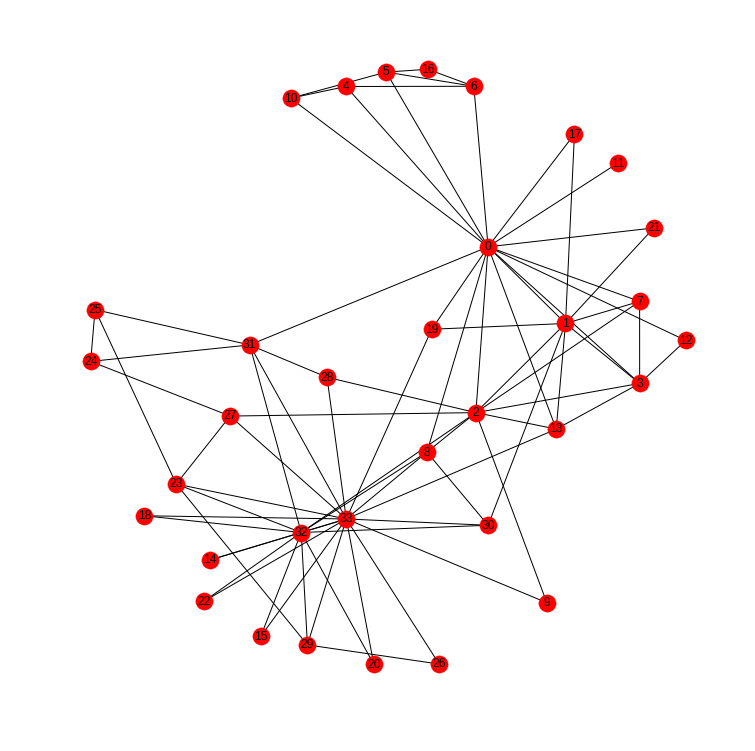

In [26]:

########################" génération de graphe 34 noeuds & 78 arretes par default###############################"
n=34
G_karate = nx.karate_club_graph()


########################                affichage du graphe       ###############################################
# on définit une position des noeuds qui peut être ré-utilisée plusieurs fois
# en appelant la fonction nx.draw avec l'option pos=pos
pos = nx.spring_layout(G_karate)
plt.figure(figsize=(10,10))
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

#### Question 7

**On va appliquer un clustering hiérarchique pour faire de la détection de communauté. On calcule d'abord la matrice des distances entre noeuds, où la distance entre 2 noeuds correspond à la longueur du plus court chemin**

In [0]:
# le code suivant calcule une matrice de taille n x n
# distances[i, j] contient la longueur du plus court chemin entre les noeuds i et j
pcc_longueurs=nx.all_pairs_shortest_path_length(G_karate)
distances=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][j]

On peut maintenant utiliser l'implémentation de clustering hiérarchique ascendant de `scikit-learn` avec le *lien moyen* comme mesure de dissimilarité entre clusters. 


On rappelle que la classification hiérarchique (ou hierarchical clustering en anglais) est l’une des approches les plus importantes pour l’exploration des données multivariées. L’objectif est d’identifier des groupes (i.e., clusters) d’objets similaires dans un jeu de données. 

Brièvement, les deux stratégies de classification les plus courantes sont:

* La classification ascendante hiérarchique (CAH), utilisée pour identifier des groupes d’observations similaires dans un jeu de données. C'est ce qu'on va utiliser dans notre approche .
* Le Partitionnement en K-moyennes (k-means en anglais), utilisé pour diviser un jeu de données en plusieurs groupes.


![Texte alternatif…](https://cdn-images-1.medium.com/max/800/1*oF00T9hCGpr6N-1zm2M1nw.gif)

On affiche tout d'abord le clustering à 2 clusters

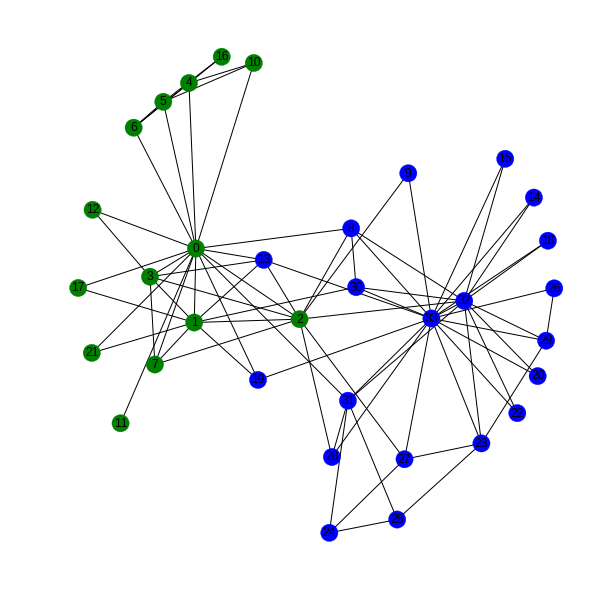

In [28]:
############ number of clusters = 2 #################################
aggmodel=AgglomerativeClustering(n_clusters=2, affinity='precomputed',linkage='average')
labels=aggmodel.fit_predict(distances)

##############  affichage du graphe ###############################

color_map = []
for i, node in enumerate(G_karate):
    if labels[i] ==0:
        color_map.append('blue')
    elif labels[i] ==1:
      color_map.append('green') 
    elif labels[i] ==2:
      color_map.append('red')  
    else :
      color_map.append('black')  
      
plt.figure(figsize=(8,8))
nx.draw(G_karate,node_color = color_map,with_labels = True)
plt.show()


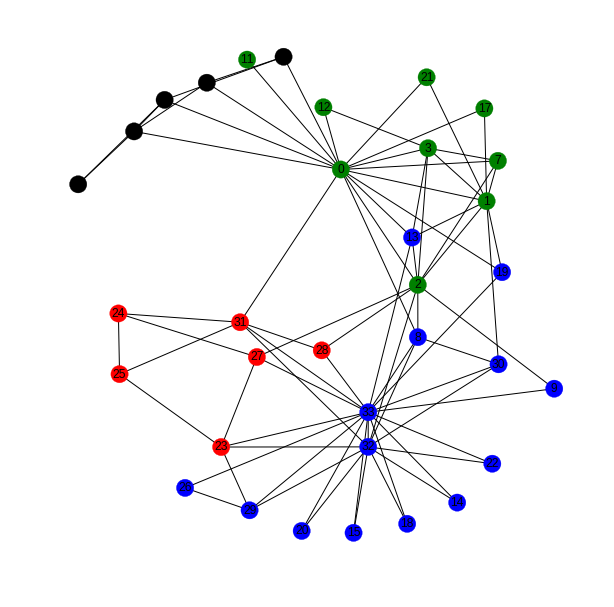

In [29]:
############ number of clusters = 4 #################################


aggmodel=AgglomerativeClustering(n_clusters=4, affinity='precomputed',linkage='average')
labels=aggmodel.fit_predict(distances)


##############  affichage du graphe ###############################
color_map = []
for i, node in enumerate(G_karate):
    if labels[i] ==0:
        color_map.append('blue')
    elif labels[i] ==1:
      color_map.append('green') 
    elif labels[i] ==2:
      color_map.append('red')  
    else :
      color_map.append('black')  
      
plt.figure(figsize=(8,8))

nx.draw(G_karate,node_color = color_map,with_labels = True)
plt.show()

On constate que les deux graphes obtenus  permettent de detecter des communités dans les graphes  . Avec un nombre de cluster = 4 , on trouve que le noeud 0 est connecté un nombre faible de noeuds  bien qu'il a un degré très elevé dans le jeux de données , il faudra peut -etre essayer d'autres mesures de distance et élaborer une analyse comparative  . 
Afin de comparer les deux modèles , on peut par exemple calculer le ppc moyen au sein de chaque communité pour évaluer sa densité , et on regarde ensuite quel paramètre nb_cluster donne des regroupements de noeuds plus compacts 


#### Question 8

**On va mettre en évidence visuellement les différences entre quelques mesures de centralité des noeuds**


Les formules de chaque mesure de centralité sont déjà cités dans le cours , rappelons juste leur intérpretation : 


* Centralité de degré : Un nœud ayant beaucoup de liens est considéré comme
important . Un acteur central est l’acteur le plus actif de point de vue de
communication 

* Centralié de proximité : Ce score est inversement proportionnel à la somme des longeurs des plus courts chemins des autres noeuds . Le nœud qui communique le plus facilement avec les autres
nœuds est important.

* Centralité d’intermédiarité :  Ce score représente le nombre de fois qu'un noeud a été un intermediaire de connexion entre deux autres noeuds  .Le nœud qui rapproche le plus les autres nœuds est important.

* Centralité de vecteur : La centralité d’un nœud dépend des centralités de ses voisins.  c'est la base de  l'algorithme utilisé dans ranking des pages de google , ce score représente le nombre de pas de longeur infin qui ramène un noeud donné  .




Commençons par afficher simplement les distributions des scores pour chaque mesure :


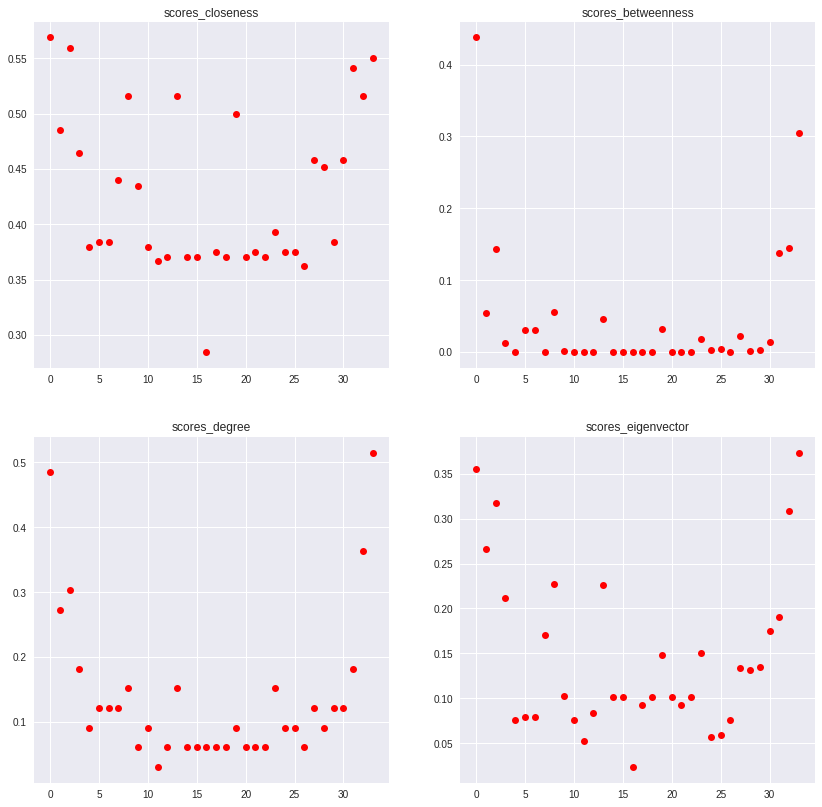

In [30]:


#################################### calcul des scores ###########################
scores_closeness=nx.closeness_centrality(G_karate, u=None, distance=None, normalized=True)
scores_betweenness=nx.betweenness_centrality(G_karate)
scores_degree=nx.degree_centrality(G_karate)
scores_eigenvector=nx.eigenvector_centrality(G_karate)



####################################plot des distributions des scores ############


plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(14,14))
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=1

scores_closeness=nx.closeness_centrality(G_karate, u=None, distance=None, normalized=True)
scores_betweenness=nx.betweenness_centrality(G_karate)
scores_degree=nx.degree_centrality(G_karate)
scores_eigenvector=nx.eigenvector_centrality(G_karate)
graph_titles=["scores_closeness","scores_betweenness","scores_degree" ,"scores_eigenvector"]
for score in [scores_closeness ,scores_betweenness,scores_degree ,scores_eigenvector] :  
    betweennessDict = score
    n = len(betweennessDict)
    x = range(n)
    y = []
    for sen in betweennessDict.keys():  
        y.append( betweennessDict[sen])
  
    plt.subplot(2,2, num)
 
    # Plot the lineplot 
    plt.plot(x,y,'ro') 
    # Add title
    plt.title(graph_titles[num-1], loc='center', fontsize=12, fontweight=0 )
    num+=1


Les allures des courbes de "betweeness" et "degree" sont similaires ,cela ne s'applique pas pour les autres pairs des mesures . Essayons maintenant d'afficher la structure de graphe en utilisant chacun des scores :

Text(0.5,1,"Centralite d'intermediarite")

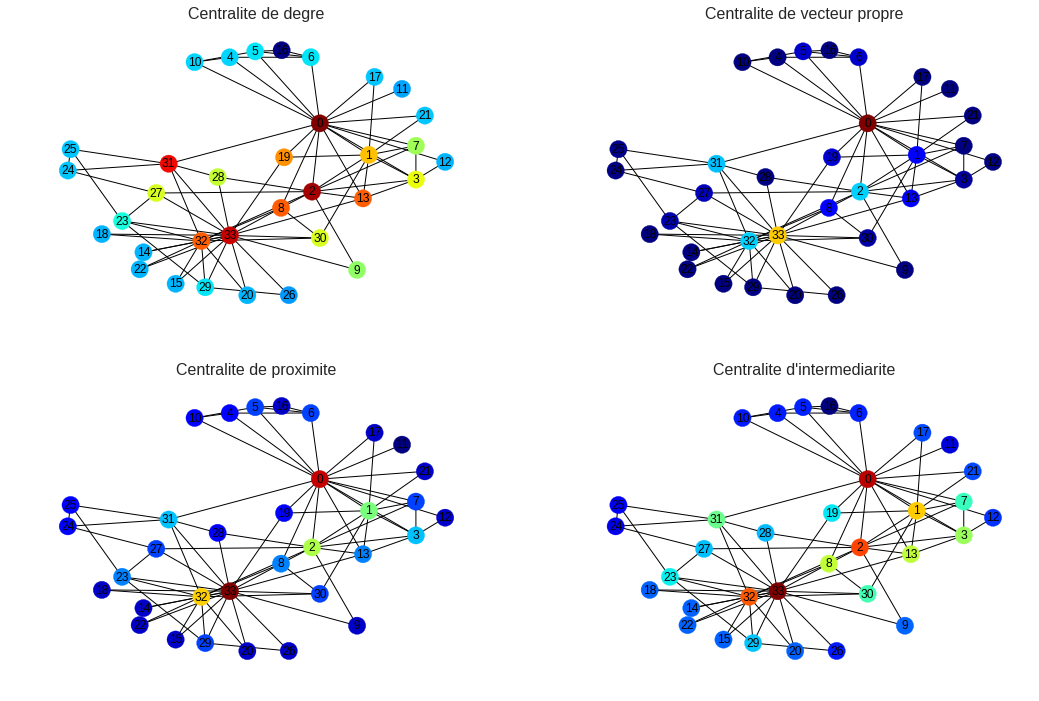

In [31]:
############################# Récupération des scores ##############################

c_degree=list(nx.closeness_centrality(G_karate, u=None, distance=None, normalized=True).values())
c_eigenvector=list(nx.betweenness_centrality(G_karate).values())
c_closeness=list(nx.degree_centrality(G_karate).values())
c_betweenness=list(nx.eigenvector_centrality(G_karate).values())


############################# Affichage des graphes ###################################
plt.figure(figsize=(18, 12))
f, axarr = plt.subplots(2, 2, num=1)
plt.sca(axarr[0,0])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_degree, node_size=300, pos=pos, with_labels=True)
axarr[0,0].set_title('Centralite de degre', size=16)

plt.sca(axarr[0,1])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_eigenvector, node_size=300, pos=pos, with_labels=True)
axarr[0,1].set_title('Centralite de vecteur propre', size=16)

plt.sca(axarr[1,0])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_closeness, node_size=300, pos=pos, with_labels=True)
axarr[1,0].set_title('Centralite de proximite', size=16)

plt.sca(axarr[1,1])
nx.draw(G_karate, cmap = plt.get_cmap('jet'), node_color = c_betweenness, node_size=300, pos=pos, with_labels=True)
axarr[1,1].set_title('Centralite d\'intermediarite', size=16)

* Centralité de degré : comme expliqué  , le noeud ayant beaucoup de liens est considéré comme important et qui communique le plus avec les autres noeuds , dans notre exemple on voit bien que le noeud 0 et le noeud 33 ont les scores les plus élévés car ils ont connects directement à plusieurs noeuds du graphes , contraitement au noeud périphériques . Si on vérifie dans la documentation du graphe , on trouve que les noeuds 0 & 33 correspondent  au instructeur /président du club  , ce qui est cohérent avec les scores obtenus  . Ces noeuds ont également des scores élevés  selon les autres mesures .

* On remarque également que les scores des mesures de betweeness /vecteur propre et betweeness/proximité ne sont pas corrélés pour la plupart des noeuds . A titre d'exemple , le noeud 8 présente un score d'intermédiarité relativement moyen mais un score de proximité très faible.  Par contre  on constate que le ranking basé sur les scores d'intermediarité et de degré  sont  proches . On peut dire que les individus qui ont beaucoup de connexion rapprochent également les neouds .

 

### Graphe des produits Amazon

#### Question 9 (bonus +2 pts)

**On va maintenant étudier un graphe de grande taille dont les noeuds sont des produits vendus par Amazon, et deux noeuds sont connectés si les deux produits sont fréquemment achetés ensemble (plus de détails [ici](https://snap.stanford.edu/data/com-Amazon.html))**

In [0]:
######################################## chargement du fichier du graphe ###################################
G_amazon = nx.read_edgelist('amazon.txt.gz')

In [0]:
 print( "nombre de noeuds %s , nombre d'arretes %s " %(nx.number_of_nodes(G_amazon),nx.number_of_edges(G_amazon)))

nombre de noeuds 334863 , nombre d'arretes 925872 


On voit que le graphe comporte un nombre enorme de noeuds et d'arretes , de ce fait , il est difficile de visualiser les relations entre les graphes et aussi calculer les plus courts chemins ( PPC  ) .  

Essayon d'afficher les statistiques de base sur le graphe :

In [0]:
###################################### Affichage de statistiques sur les degrés ##################################
listdegree=[val for (node, val) in G_amazon.degree().items()]

max_degree=max(listdegree)
min_degree=min(listdegree)
mean_degree=np.mean(listdegree)
median_degree=np.median(listdegree)


print( "Le max des degrees est %s , le min est %s, la moyenne est %.2f  et la mediane est %s " %(max_degree,min_degree,mean_degree,median_degree))

Le max des degrees est 549 , le min est 1, la moyenne est 5.53  et la mediane est 4.0 


On voit qu'il  y une légère disparité dans les dégrés des noeuds  : 
* il y a des articles ayant des dégrés dépassant 500  , ça pourrait etre des biens de première nécessité
* il y a des articles ayant un degré =1  , on peut dire qu'il n'y a pas une 'vraie' similarité ( ou complémentarité )  entre les biens  et que leur achat ensemble était un phénomène aléatoire lié à l'acheteur

In [0]:
################################## Calcul du coefficient du clustering par noeud ####################################

print ("Le coefficient de clustering par noeud : \n" )
print(nx.clustering(G_amazon))

Le coefficient de clustering par noeud : 



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Malheureusement , vu la taille du graphe , on n'a pas pu calculer les coeficients  de clustering . Il faudra lancer les scripts ci-dessous das une machine très performante.

In [0]:
################################## Calcul du coefficient du clustering global ####################################

coef_clustering_e=np.mean(list(nx.clustering(G_erdos).values()))
print ("Le coefficient de clustering global est %.4f " % np.mean(list(nx.clustering(G_erdos).values())))

In [0]:
### calucl des coefficients de clustering  par degré 

listdegrees=np.unique(list(G_amazon.degree().values()))
listnodesperdegree=[]
listclustcoefperdegree=[]

for deg in listdegrees:
  #print(deg)
  #listnodesperdegree.append([k  for k,v in G_amazon.degree().items() if v in [deg]])
  listclustcoefperdegree.append([nx.clustering(G_amazon,k)  for k,v in G_amazon.degree().items() if v in [deg]])



In [0]:
clustering_degree=list(map ( lambda x : np.mean(x) ,listclustcoefperdegree ))

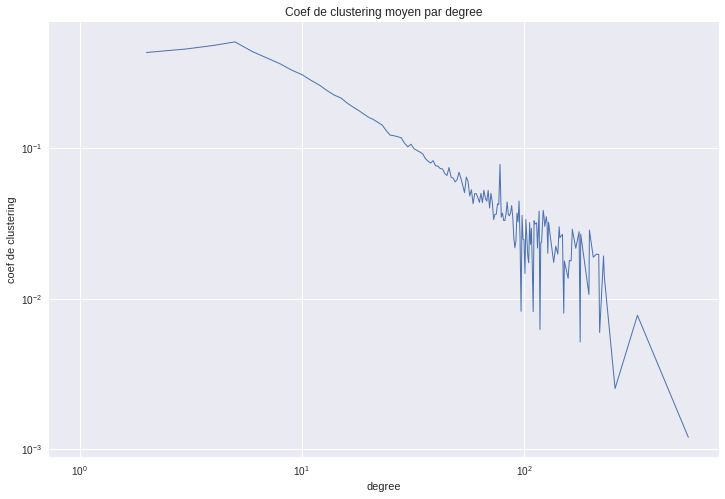

In [0]:

plt.figure(figsize=(12,8))
plt.loglog(listdegrees,clustering_degree,linewidth=1)
plt.xlabel('degree')
plt.ylabel('coef de clustering')
plt.title('Coef de clustering moyen par degree')
plt.show()



 D'après le graphe ci-dessus , les noeuds ayant un degré faible ont un coefficient de clustering elevé et vice versa . Cela veut dire que sui un produit est connecté à des articles , la plupart de ces articles ne sont pas connectés entre eux . Ce qui est vraisemblablement dû au fait qu'on achete générallement des articles variés .
 
 
Ce genre d'analyse de graphes peut être mise à profit pour élaborer des systèmes de recommandation. Ceux-ci visent à filtrer la quantité d’information aujourd’hui disponible dans le site d'amzon ou les sites e-commerce en général . Le calcul des scores de proximité et l'élaboration d'un modèle de classification hiérarchique  peuvent servir dans les mécanismes de recommendations des articles en lignes en créant des communités des produits qui s'achetent ensemble  ou en se basant sur le plus court chemin  (top 5 par exemple).


Les techniques classiques reposent sur une analyse de la matrice encodant les informations de l’historique du système : quel utilisateur a vu/aimé/acheté quoi ? Quel sont les articles qui ont  été achété avec un produits ? 
On peut utiliser une représentation sous forme de graphe biparti pour visualiser les interactions ayant eu lieu dans le site e-commerce. Les produits sont reliés les uns des autres, avec un poids généralement proportionnel à l’intensité de cette interaction ( nombre d'achat ensemble) . 



On peut également calculer les plus courts chemin . Malheureusement , ce calcul prend beaucoup de temps vu la taille du graphe .De ce fait , on a calculé le PPC uniquement pour quelques noeuds 

In [0]:

############################################ récuperation du ppc et du diamètre ######################################


listppcodes=[]
for node in list(G_amazon.nodes())[1:50]: 
    listppcnodes.append((list(nx.shortest_path_length(G_amazon,source=node).values())))
    




####################### recuperation des tous les plus courts chemins ########################

### liste de tous les ppc  en supprimant les 0 ######
flat_list_ppc_b = [item for sublist in listppcnodes for item in sublist if item >0]

### calcul de la moyenne des ppc #####
mean_ppc_b=np.mean(flat_list_ppc_b)


######################## recuperation des max des ppc #######################################
    
diametre_b=np.max(flat_list_ppc_b)



88160
118052
161555
244916
346495
444232
447165
500600
2
27133
62291
170507
299250
326776
331042
411179
451149
454888
4
16050
286286
310803
320519
408108
448284
5
173362
305321
407216
489756
6
162248
298989
398542
495077
7
30028
47672
355935
8
10758
55461
60605
148586
184847
242156
445607
453513
10


## Prédiction dans les graphes

Un *ego-network* est un sous-graphe d'un réseau social centré sur un utilisateur. Ici on va travailler avec un ego-network Facebook (téléchargeable [ici](https://snap.stanford.edu/data/egonets-Facebook.html)) qui représente les amis d'un utilisateur donné (sans ce dernier) et les liens d'amitié entre eux. Le jeu de données contient 10 ego-networks, on va travailler avec l'un d'entre eux seulement qui se prête bien à la visualisation.

Nombre de noeuds: 150
Nombre d'arêtes: 1693
Nombre de composantes connexes: 2


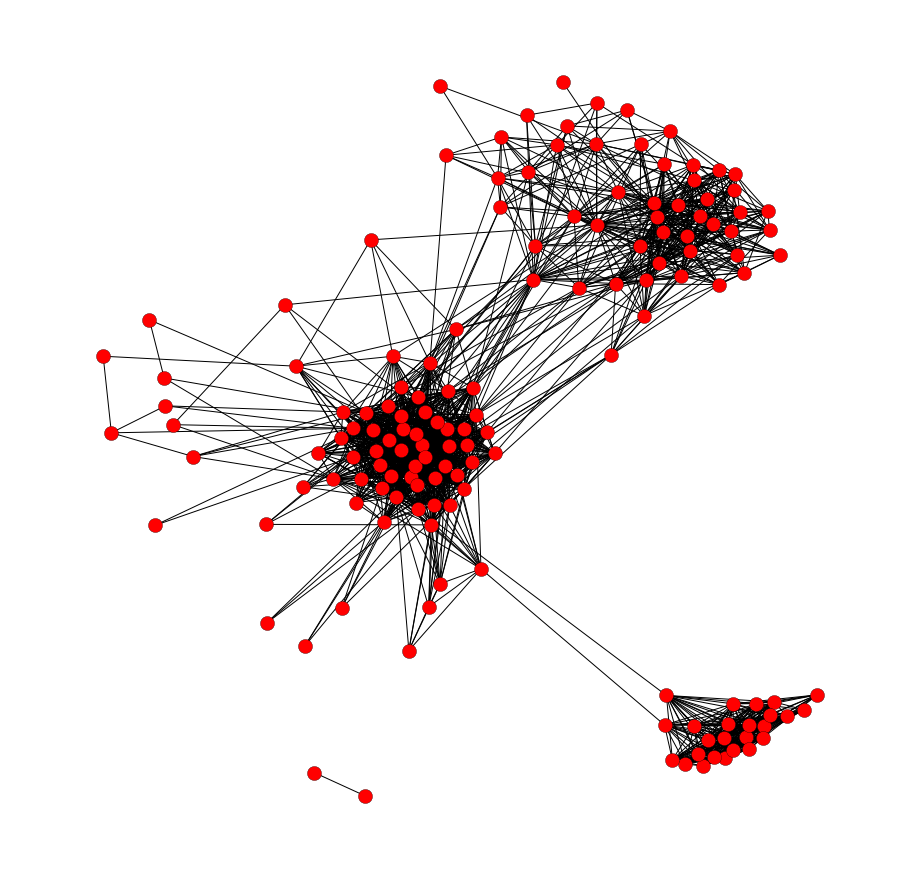

In [32]:
# if os.path.exists('facebook.tar.gz') is False:
#     resp = urllib.urlretrieve('https://snap.stanford.edu/data/facebook.tar.gz',
#                               'facebook.tar.gz')
tarfile.open("facebook.tar.gz", 'r:gz').extractall('.')

G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
# on renumérote les noeuds de 0 à n-1
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)

plt.figure(figsize=(12,12))
nx.draw(G_fb, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
print("Nombre de noeuds: %d" % n)
print("Nombre d'arêtes: %d" % m)
print("Nombre de composantes connexes: %d" % nx.number_connected_components(G_fb))

#### Question 10

On va maintenant essayer de prédire des liens dans le réseau. Pour cela, on commence par extraire une proportion des arêtes du graphe, dont on cherchera à prédire l'existence parmi toutes les arêtes non-existantes possibles. Le graphe d'apprentissage est le graphe original auquel on retire les arêtes sélectionnées.

In [34]:
# G_fb_train est une copie du graphe original
# auquel on a retiré 20% des arêtes choisies aléatoirement

proportion_edges = 0.2
edge_subset = random.sample(G_fb.edges(),
                            int(proportion_edges * G_fb.number_of_edges()))
G_fb_train = G_fb.copy()
G_fb_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Nombre d'arêtes retirées: %d" % edge_subset_size)
print("Nombre d'arêtes restantes: %d" % (m - edge_subset_size))
print("Nombre total d'arêtes non-existantes: %d" %
      len(list(nx.non_edges(G_fb_train))))

Nombre d'arêtes retirées: 338
Nombre d'arêtes restantes: 1355
Nombre total d'arêtes non-existantes: 9820


On veut scorer les arêtes non-existantes de façon à ce que les arêtes réelles retirées aient un plus grand score. On utilise plusieurs mesures de similarité entre paires de noeud et on calcule l'Aire sous la Courbe ROC (AUC). On trace également les courbes ROC pour chaque similarité.

##### 1- score de jaccard 

Le score de jaccard est définie par la formule suivante  :

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7)


Dans notre cas , l'intersection de A et B représente l'intersection entre le groupe de noeuds adjacents à A  et les noeuds adjacents à B 

Pour calcule cet indice , on peut simplement faire appel à la fonction `jaccard_coefficient` du package networkx 

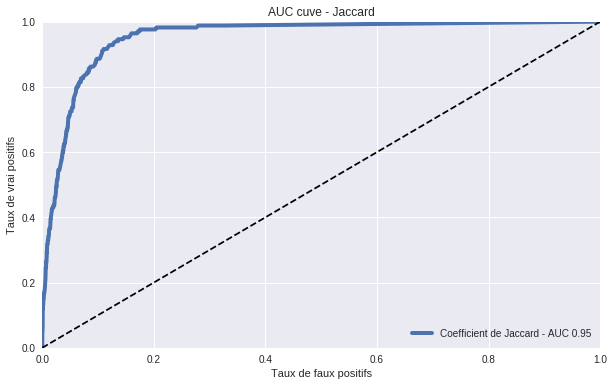

In [35]:

# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_fb_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

############# jaccard ########################

vec_prob=[ x[2]  for x in pred_jaccard ]
vec_prob=np.array(vec_prob)
vec_label=np.array(label_jaccard).astype('int')
y = vec_label
pred = vec_prob

fpr_jaccard,tpr_jaccard, thresholds = metrics.roc_curve(y, pred, pos_label=1)
auc_jaccard= metrics.auc(fpr_jaccard,tpr_jaccard)


# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, label='Coefficient de Jaccard - AUC %.2f' % auc_jaccard, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')
plt.title('AUC cuve - Jaccard')

plt.show()


#### 2. Score Adamic Adar 

Le score Adamaic Adar est définir par la formule  ci-dessous : 

![alt text](https://neo4j.com/docs/graph-algorithms/current/images/adamic-adar.svg)


Pour calculer le score , on peut utiliser la fonction `adamic_adar_index` de networkx

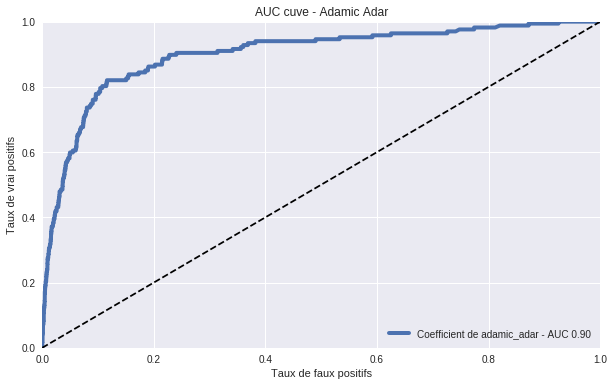

In [36]:



###########""" generation des probabilité avec des softmax sur le score ###############

pred_adamic_adar = list(nx.adamic_adar_index(G_fb_train))




dictsum={}
for u, v, p in pred_adamic_adar : 
  if str(u) in dictsum :
    dictsum[str(u)]=dictsum[str(u)]+ np.exp(p)
  else : 
    dictsum[str(u)] =0
  
new_pred_softmax=[]
for u, v, p in pred_adamic_adar : 
  new_pred_softmax.append ((u,v, np.exp(p)/ dictsum[str(u)]))



# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec adamic_adar
pred_adamic_adar = new_pred_softmax
score_adamic_adar, label_adamic_adar= zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_adamic_adar])

############# adamic_adar ########################

vec_prob=[ x[2]  for x in pred_adamic_adar ]
vec_prob=np.array(vec_prob)
vec_label=np.array(label_adamic_adar).astype('int')
y = vec_label
pred = vec_prob

fpr_adamic_adar,tpr_adamic_adar, thresholds = metrics.roc_curve(y, pred, pos_label=1)
auc_adamic_adar= metrics.auc(fpr_adamic_adar,tpr_adamic_adar)
# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_adamic_adar, tpr_adamic_adar, label='Coefficient de adamic_adar - AUC %.2f' % auc_adamic_adar, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.title('AUC cuve - Adamic Adar')
plt.legend(loc='lower right')
plt.show()


#### Score de  preferential attachment

Ce score est donnée par la formule ci-dessous : 

![alt text](https://neo4j.com/docs/graph-algorithms/current/images/preferential-attachment.svg)

Il peut être calculé directement via la commande `preferential_attachment` de networkx

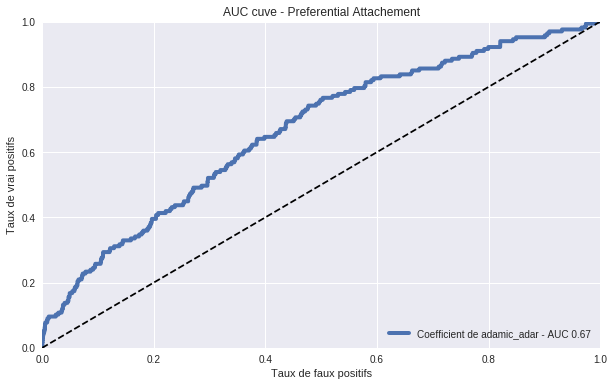

In [37]:



###########""" generation des probabilité avec des softmax sur le score ###############

pred_pref_att = list(nx.preferential_attachment(G_fb_train))




dictsum={}
for u, v, p in pred_pref_att : 
  if str(u) in dictsum :
    dictsum[str(u)]=dictsum[str(u)]+ np.exp(p/100)
  else : 
    dictsum[str(u)] =0
  
new_pred_softmax=[]
for u, v, p in pred_pref_att : 
  new_pred_softmax.append ((u,v, np.exp(p/100)/ dictsum[str(u)]))



# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec preferential_attachment
pred_pref_att = new_pred_softmax
score_pref_att, label_pref_att= zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_pref_att])

############# preferential_attachment ########################

vec_prob=[ x[2]  for x in pred_pref_att ]
vec_prob=np.array(vec_prob)
vec_label=np.array(label_pref_att).astype('int')
y = vec_label
pred = vec_prob

fpr_pref_att,tpr_pref_att, thresholds = metrics.roc_curve(y, pred, pos_label=1)
auc_pref_att= metrics.auc(fpr_pref_att,tpr_pref_att)
# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_pref_att, tpr_pref_att, label='Coefficient de adamic_adar - AUC %.2f' % auc_pref_att, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')
plt.title('AUC cuve - Preferential Attachement')
plt.show()


In [38]:
print ( " L'AUC du jaccard est %.2f%%" %(100*auc_jaccard))
print ( " L'AUC du Adamic Adar est %.2f%%" %(100*auc_adamic_adar))
print ( " L'AUC du Preferentiel Attachement est %.2f%%" %(100*auc_pref_att))


 L'AUC du jaccard est 95.33%
 L'AUC du Adamic Adar est 90.03%
 L'AUC du Preferentiel Attachement est 66.59%


On voit une  grande difference entre les AUC calculés sur les trois mesures . Le score de jaccard permet d'avoir la meilleure performance , ensuite Adamic Adar  et enfin  Preferentiel Attachement qui ne marche pas très bien dans notre contexte  . De ce fait , on peut dire que le choix de la mesure de similarité conditionne la performance de modèle de scoring  , cela peut être dû à la structure ou  la nature de graphe .

#### Question 11

On va maintenant faire de la classification semi-supervisée des noeuds. Pour cela on va utiliser les attributs qui sont fournis avec l'ego-network. Ces attributs représentent des caractéristiques (anonymisées) des utilisateurs du réseau. Dans la suite nous allons utiliser l'attribut `43` qui vaut `+1` (rouge) si la personne a étudié dans une école donnée, et `-1` (bleu) sinon.

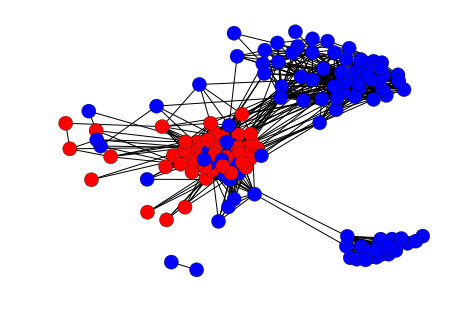

In [39]:
# on charge les labels des noeuds et on les affiche

with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')
for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = list(map(int, line.split()[1:]))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

On voit que cet attribut est relativement lisse sur le graphe, il se prête donc bien à la classification par propagation de label (ce n'est pas le cas de tous les attributs!). On va donc sélectionner aléatoirement une petite proportion de noeuds pour lesquels nous aurons accès aux labels. Notre tâche sera d'utiliser ces noeuds étiquetés ainsi que la structure du graphe pour prédire le label des autres noeuds. On regarde d'abord les noeuds étiquetés.

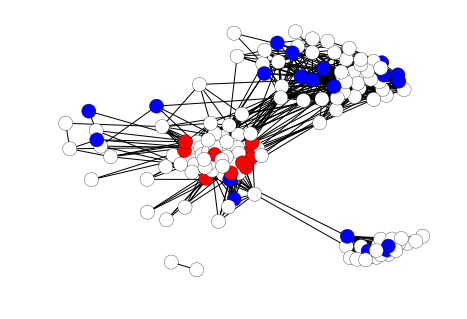

In [40]:
# on sélectionne 20% des noeuds pour lesquels on a accès à l'étiquette

random.seed(5)
proportion_nodes = 0.2
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = known_labels, node_size=200, pos=pos)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black

On va maintenant appliquer la propagation de label et voir les résultats

Rappelons que la propagation de labels est l’une des méthodes les plus rapides pour la détection
de communautés, de complexité quasi−linéaire en terme d’arêtes. Il s’agit d’une méthode locale
où chaque nœud possède son propre label qui change par interaction avec son voisinage . L'algoithme 
est basée sur la transmission d’un label d’un nœud à ses voisins. Un état d’équilibre est atteint lorsque
chaque noeud a son label égal à celui de la majorité de ses voisins. 


![alt text](https://raw.githubusercontent.com/kasamoh/Data-analysis/master/graph_analysis/images/label_propagation.png)


Pour applique la propagation de label , on utilisera la formule ci-dessous pour l'update de la matrice de prédiction F  : 

![alt text](https://raw.githubusercontent.com/kasamoh/Data-analysis/master/graph_analysis/images/formule.png) 


avec  : 

* alpha : Paramètre de mise à jour 
* Lsym : Matrice de laplacienne normalisée du graphe 
* F est initialisé à Y 

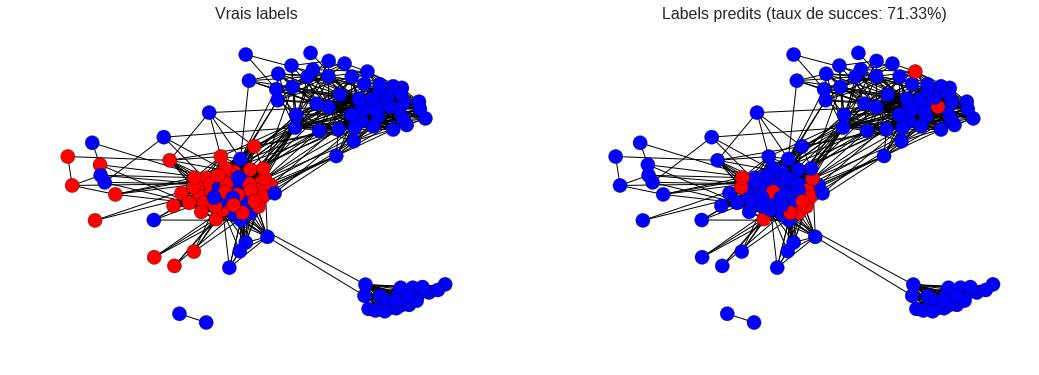

In [41]:
################### calcul d Lsym ##################

alpha = 0.7
niter=10000
L_sym = nx.normalized_laplacian_matrix(G_fb)

##### on calcule la matrice de labels initiale #####
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1

# ################### propagation de labels ########
F=Y.copy()### on initialise F à y
n=len(Y) ### recupère la taille de y pour générer la mtrice I


for  iter in range(niter) : 
  
  F=np.dot(alpha * (np.identity(n)-L_sym) , F) + (1-alpha)*Y
  
  
################### labels prédits à mettre dans une variable F_pred pour affichage ci-dessous
F_pred=[]
for i in range(len(F)) :
  if np.argmax(F[i])==0: 
    F_pred.append(-1) 
  else :
    F_pred.append(1)

F_pred=np.array(F_pred)

##################taux de succes a mettre dans une variable pred #############
pred = np.mean(F_pred==labels)
#score_net= (np.sum(F_pred==labels)-np.sum(known_labels !=0))/ (len(labels)-np.sum(known_labels !=0))



################ affichage des graphes vrais labels / labels prédits ##########""
plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)
plt.sca(axarr[0])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = labels, node_size=200, pos=pos)
axarr[0].set_title('Vrais labels', size=16)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black
plt.sca(axarr[1])
nx.draw(G_fb, cmap = plt.get_cmap('bwr'), nodelist=range(n), node_color = F_pred, node_size=200, pos=pos)
axarr[1].set_title('Labels predits (taux de succes: %.2f%%)' % (100*pred), size=16)
plt.gca().collections[0].set_edgecolor("#000000") # set node border color to black


La performance de  l'algorithme de propagation est plutot bonne dans la mesure où on obtient  un taux de précision qui dépasse 70%  . On a testé plusieurs seed et le score varie entre 70% et 82% . 
Le score calculé est brut , on n'a pas supprimé les "known_labels" de F_pred  afin de s'assurer que l'algorithme de propagation respecte la contrainte de ne pas changer les noeuds labélisés .Si on supprime ces éléments , on obtient un score légèrement plus faible . L'instruction qui permet de calculer ce score est mis en commentaire juste après le calcul de `pred` . 


Essayons maintenant d'analyser la matrice de confusion : 


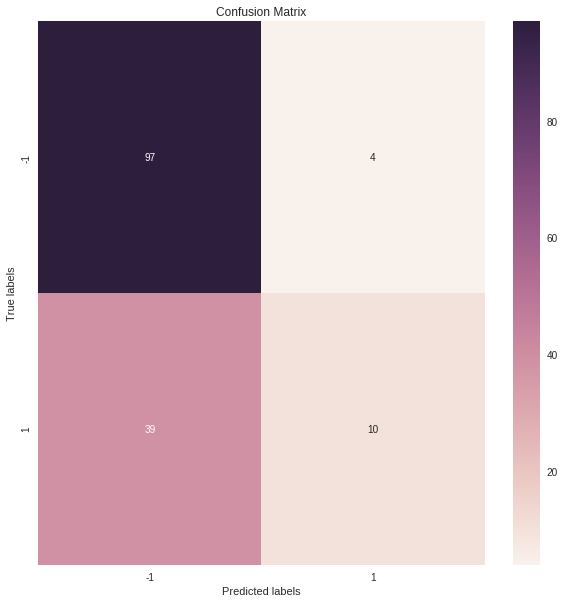

In [42]:


cm = confusion_matrix(labels,F_pred)

plt.figure(figsize=(10,10))
ax= plt.subplot()
sns.heatmap(cm.astype('int'), annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['-1', '1']); ax.yaxis.set_ticklabels(['1', '-1']);

On voit que l'errreur se fait principalement au niveau des faux négatifs ( on prédit du bleu  alors qu'il s'agit du rouge ) , on peut améliorer cela en jouant sur le paramètre alpha ou ajouter plus de noeuds de label -1 dans l'échantillon de known_labels

# Conclusion 

Durant ce TP , on a pu mieux comprendre les structures des graphes et connaitre leurs applications dans la detection des communautés ou l'apprentissage semi-supervisé . Le Package NetworkX est très riche et nous a facilité le calcul de plusieurs mesures de la théorie de graphe . 
L'exemple sur le jeux de donnéees d'Amazon était très intéressant dans la mesure où on a pu comprendre comment on peut exploiter la stucture des graphes dans les mécansimes de recommendations . 
